<a href="https://colab.research.google.com/github/Muriloozol/Elementos_de_m-quina/blob/master/Elementos_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Elementos de Máquina

Alunos:
- Thiago Pessoa
- Murilo Ozol

Professor: 
- Rodrigo de Souza Vieira

Outras informações
- Dupla 7
- [Ementa](https://moodle.ufsc.br/pluginfile.php/3279712/mod_resource/content/9/programa.pdf)


## Descrição do Trabalho
Nesta disciplina é proposto a realização de um Projeto de redutor como forma de aplicar as metodologias de ensino *learning by doing* e *flip class*. O projeto será dividido em etapas bem definidas de acordo com os elementos de máquina a serem abordados. A seguinte sequência será seguida:

1. Projeto dos pares de engrenagens
2. Definição da correia ou corrente no eixo de saída do redutor
  1. Distância entre centros de 480 mm
  2. Relação de desmultiplicação de 1:3,2
3. Projeto dos eixos
4. Projeto da Ligação cubo eixo entre as peças




### Motivação para utilização do google colab

O colab é uma ferramenta que permite a criação de códigos de python no formato de notebooks. Esta é uma ótima maneira de documentar, otimizar e compartilhar o projeto.

In [2]:
import numpy as np # Biblioteca para operações com arrays e matrizes
import pandas as pd # Análise e manipulação de dados
import regex as re # Regular expressions
import json
import matplotlib.pyplot as plt # Gráficos

### Projeto sorteado
1º Projeto

Redutor de dois estágios

- Rotação na entrada: 1750 rpm
- Rotação de saída: 110 rpm
- Distância entre centros 238 mm
- Potência do motor 45 CV

**Primeiros Cálculos**

In [3]:
rpm_in = 1750 # rpm
rpm_out = 110 # rpm
a = 238 # mm (distância entre centros)
pot_engine = 45 # CV
pot_engine = pot_engine * 745.7 # W

# Relação de transmissão total
i_t = rpm_in/rpm_out

# Erro permitido na transmissão total
i_t_error = np.abs(-i_t*0.01)

# Torque
T = (pot_engine * 30000 * 0.101972)/(np.pi * rpm_in) # kgfmm

print('A relação de transmissão total é {}'.format(np.round(i_t, 2)))
print('O torque na entrada é {} kgfmm'.format(np.round(T,2)))

A relação de transmissão total é 15.91
O torque na entrada é 18672.0 kgfmm


## Recomendações de Projeto

#### **Recomendação de relação de transmissão**

>$i_1=0,71*i_t^{0.7}$

>$i_t = i_1*i_2$

In [4]:
# Relações de transmissão para os dois estágios
i_1 = 0.71*i_t**0.7 
i_2 = i_t/i_1

print('A relação de transmissão do primeiro par é: {}'.format(np.round(i_1,2)))
print('A relação de transmissão do segundo par é: {}'.format(np.round(i_2,2)))

A relação de transmissão do primeiro par é: 4.93
A relação de transmissão do segundo par é: 3.23


#### **Pré-dimensionamento baseado no colapso por fadiga superficial**
> $d_1'= \sqrt[3]{4T_1(i+1)\over iy_M\Psi_d}$

Onde,

- $d_1'$ -> o diâmetro primitivo do pinhão em $mm$
- $T_1$  -> torque de entrada em $kgfmm$
- $y_M$  -> fator MAAG (dado na tabela 10.3 em $kgf/mm^2)$
- $i$    -> Relação de transmissão
- $\Psi_d$ -> Relação entre largura e diâmetro

> $\Psi_d = \frac{b}{d}$

O Módulo pode ser calculado por
> $m = \frac{d_1'}{Z_1}$

Onde,
- $Z_1$ -> Numero de dentes 

**Parâmetros**

Valores iniciais tirados de tabelas propostas pela literatura

In [5]:
y_m = 0.8
Psi_d_1 = 0.5
Psi_d_2 = 0.5 

**Primeiro par**

In [6]:
# Aplica a equação para o primeiro par
d1_1 = ((4*T*(i_1+1))/(i_1*y_m*Psi_d_1))**(1/3)
d2_1 = i_1*d1_1

print('Diâmetro do pinhão do primeiro par: {}mm'.format(np.round(d1_1,2)))
print('Diâmetro da coroa do primeiro par: {}mm'.format(np.round(d2_1,2)))
print('A distância entre centros é: {}mm'.format(np.round((d1_1+d2_1)/2, 2)))

Diâmetro do pinhão do primeiro par: 60.79mm
Diâmetro da coroa do primeiro par: 299.39mm
A distância entre centros é: 180.09mm


**Segundo par**

In [7]:
# Aplica a equação para o segundo par
d1_2 = ((4*T*(i_2+1))/(i_2*y_m*Psi_d_2))**(1/3)
d2_2 = i_2*d1_2

print('Diâmetro do pinhão do segundo par: {}mm'.format(np.round(d1_2,2)))
print('Diâmetro da coroa do segundo par: {}mm'.format(np.round(d2_2,2)))
print('A distância entre centros é: {}mm'.format(np.round((d1_2+d2_2)/2, 2)))

Diâmetro do pinhão do segundo par: 62.53mm
Diâmetro da coroa do segundo par: 202.0mm
A distância entre centros é: 132.26mm


####**Otimizando o parâmetro $\Psi_d$**

In [8]:
def calculate_a_error(i_1, i_2, Psi_d_1, Psi_d_2, y_m=0.8, a=238):
    """
    Calculate the `a` error given the parameters to apply on the recomendation
    equation.

    Parameters
    ----------
        i_1: float
            first pair gear ratio
        
        i_2: float
            second pair gear ratio
        
        Psi_d_1: float
            Relation between width and diameter
        
        Psi_d_2: float
            Relation between width and diameter
        
        y_m: float, default=0.8
            Maag factor
        
        a: float or int
            Desired distance between axis

    Returns
    -------
        error: float
            Sum of `error_1` and `error_2`
        
        error_1: float
            Calculated a and `a` desired difference 
        
        error_2: float
            Calculated a and `a` desired difference 
    """
    # Apply the recomendation equation
    d1_1 = ((4*T*(i_1+1))/(i_1*y_m*Psi_d_1))**(1/3)
    d2_1 = i_1*d1_1

    d1_2 = ((4*T*(i_2+1))/(i_2*y_m*Psi_d_2))**(1/3)
    d2_2 = i_2*d1_2

    # Calculated distance between axis
    a_1 = np.round((d1_1+d2_1)/2, 2)
    a_2 = np.round((d1_2+d2_2)/2, 2)
    
    # Error from both axis
    error_1 = a - a_1
    error_2 = a - a_2
    
    # Total error
    error = np.abs(error_1) + np.abs(error_2)
    
    return error, error_1, error_2

# Dict to hold the results
result = {'y_m':y_m, 
          'Psi_d_1': np.infty,
          'Psi_d_2': np.infty,
          'error': np.infty, 
          'error_1': np.infty,
          'error_2': np.infty}

# Lists to compute the errors
error_list = []
error_1_list = []
error_2_list = []

# Iteration over the Psi_d_1 for the first pair
for Psi_d_1_ in np.linspace(0.1, 1.2, 50):
    # Iteration over the Psi_d_1 for the second pair
    for Psi_d_2_ in np.linspace(0.01, 1.2, 50):   
        # Calculate the errors
        error, error_1, error_2 = calculate_a_error(i_1=i_1, i_2=i_2,
                                                    Psi_d_1=Psi_d_1_,
                                                    Psi_d_2=Psi_d_2_)
        
        # Verify if the error is smaller than the last computed
        if error < result['error']:
            # Compute the results
            result.update({'y_m':y_m, 
                           'Psi_d_1': Psi_d_1_, 
                           'Psi_d_2': Psi_d_2_, 
                           'error': error,
                           'error_1': error_1, 
                           'error_2': error_2})
            
            # Compute the errors
            error_list.append(error)
            error_1_list.append(error_1)
            error_2_list.append(error_2)

            # Override the last Psi_d
            Psi_d_1 = Psi_d_1_
            Psi_d_2 = Psi_d_2_

result

{'Psi_d_1': 0.21224489795918366,
 'Psi_d_2': 0.08285714285714285,
 'error': 4.420000000000016,
 'error_1': -1.6200000000000045,
 'error_2': -2.8000000000000114,
 'y_m': 0.8}

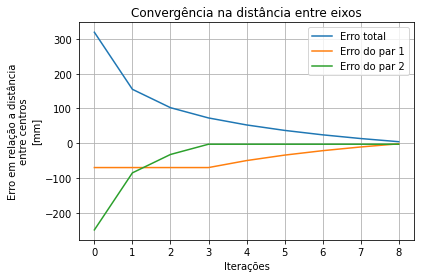

In [9]:
plt.title('Convergência na distância entre eixos')
plt.plot(error_list, label='Erro total')
plt.plot(error_1_list, label='Erro do par 1')
plt.plot(error_2_list, label='Erro do par 2')
plt.xlabel('Iterações')
plt.ylabel('Erro em relação a distância\n entre centros \n[mm]')
plt.legend()
plt.grid()
plt.show()

Reaplicando a equação de pré-dimensionamento utilizando os valores de $\Psi_d$ otimizados.

**Primeiro par**

In [10]:
d1_1 = ((4*T*(i_1+1))/(i_1*y_m*Psi_d_1))**(1/3)
d2_1 = i_1*d1_1

print('Diâmetro do pinhão do primeiro par: {}mm'.format(np.round(d1_1,2)))
print('Diâmetro da coroa do primeiro par: {}mm'.format(np.round(d2_1,2)))
print('A distância entre centros é: {}mm'.format(np.round((d1_1+d2_1)/2, 2)))

Diâmetro do pinhão do primeiro par: 80.89mm
Diâmetro da coroa do primeiro par: 398.36mm
A distância entre centros é: 239.62mm


**Segundo par**

In [11]:
d1_2 = ((4*T*(i_2+1))/(i_2*y_m*Psi_d_2))**(1/3)
d2_2 = i_2*d1_2

print('Diâmetro do pinhão do segundo par: {}mm'.format(np.round(d1_2,2)))
print('Diâmetro da coroa do segundo par: {}mm'.format(np.round(d2_2,2)))
print('A distância entre centros é: {}mm'.format(np.round((d1_2+d2_2)/2, 2)))

Diâmetro do pinhão do segundo par: 113.85mm
Diâmetro da coroa do segundo par: 367.75mm
A distância entre centros é: 240.8mm


#### **Definindo o número mínimo de dentes**

Para não haver recorte, o número mínimo de dentes é dado por:
>$Z_{min} = {2K\over \sin^2\alpha}$

onde,
- $K=1+c$ 
- $c$ é o fator de folga de fundo e $c_{padrão}=0.25$ 

$\alpha$ é o ângulo de pressão e pode assumir os seguintes valores:
- $14.5^o$
- $20^o$ -> Mais utilizado
- $25^o$

In [12]:
c = 0.25
alpha = np.pi/9

Z_min = 2*(1+c)/(np.sin(alpha)**2)
Z_min = np.ceil(Z_min)

print(f'O númeo mínimo para não haver recorte do dente é {Z_min}')

O númeo mínimo para não haver recorte do dente é 22.0


#### **Definição do módulo**

Considerando que nosso par de engrenagens é de uso geral, usaremos um módulo padronizado de classe I. O seguinte conjunto apresenta os módulos de classe I padronizados pela norma ABNT PB-90
> $	\left \{ 0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 2, 2.5, 3, 4, 5, 6, 8, 10, 12, 20,25,32,40,50 \right \}$

De acordo com a definição de módulo $m = {d_1'\over Z_1}$ podemos encontrar uma estimativa utilizando o valor do diâmetro apresentado anteriormente e o número mínimo de dentes. 


In [13]:
m_list = [0.3, 0.4, 0.5, 0.6, 0.8, 1, 1.25, 1.5, 2, 2.5,
          3, 4, 5, 6, 8, 10, 12, 20, 25, 32, 40, 50]

m = d1_1/Z_min

print('A primeira estimativa de módulo utilizando o número mínimo de \
dentes foi: {}mm'.format(np.round(m, 2)))

A primeira estimativa de módulo utilizando o número mínimo de dentes foi: 3.68mm


Verifica-se o número de dentes de todas as engrenagens utilizando o módulo padronizado mais próximo do valor encontrado.

In [14]:
def verify_rounded_m(m, d1_1, d2_1, d1_2, d2_2):
    """
    With the given diameteres and modulus, calculate the number of teeth,
    the gear ratio for the pairs and the total.

    Parameters
    ----------
    m: `int` or `float`
        modulus to verify

    d1_1: `float`
        First gear of first pair diameter

    d2_1: `float`
        Second gear of first pair diameter

    d1_2: `float`
        First gear of second pair diameter

    d2_2: `float`
        Second gear of second pair diameter

    Returns
    -------
    Dict
        Dictionary with `modulo`, `Z1_1`, `Z2_1`, `Z1_2`, `Z2_2`, `i_1`, `i_2`
        and `i_t` values
    """
    m=m

    # Calculate the number of teeth
    Z1_1 = np.round(d1_1/m)
    Z2_1 = np.round(d2_1/m)
    Z1_2 = np.round(d1_2/m)
    Z2_2 = np.round(d2_2/m)

    # Calculate the gear ratio
    i_1 = Z2_1/Z1_1
    i_2 = Z2_2/Z1_2
    i_t = i_1 * i_2


    return {'modulo': m, 
            'Z1_1':Z1_1,
            'Z2_1':Z2_1, 
            'Z1_2':Z1_2,
            'Z2_2':Z2_2,
            'i_1':i_1, 
            'i_2':i_2,
            'i_t':i_t}


verified = verify_rounded_m(m=np.round(m), d1_1=d1_1, d2_1=d2_1,
                            d1_2=d1_2, d2_2=d2_2)

print('O módulo padronizado: {}mm \n'.format(verified['modulo']))

print('Número de dentes do pinhão da engrenagem do primeiro par: \t{}'\
    .format(verified['Z1_1']))
print('Número de dentes da coroa da engrenagem do primeiro par: \t{}'\
    .format(verified['Z2_1']))
print('Número de dentes do pinhão da engrenagem do segundo par: \t{}'\
    .format(verified['Z1_2']))
print('Número de dentes da coroa da engrenagem do segundo par: \t{}\n'\
    .format(verified['Z2_2']))

print('Nova relação de transmissão do par 1: \t{}'.format(verified['i_1']))
print('Nova relação de transmissão do par 2: \t{}'.format(verified['i_2']))
print('Nova relação de transmissão total: \t{}\n'.format(verified['i_t']))

O módulo padronizado: 4.0mm 

Número de dentes do pinhão da engrenagem do primeiro par: 	20.0
Número de dentes da coroa da engrenagem do primeiro par: 	100.0
Número de dentes do pinhão da engrenagem do segundo par: 	28.0
Número de dentes da coroa da engrenagem do segundo par: 	92.0

Nova relação de transmissão do par 1: 	5.0
Nova relação de transmissão do par 2: 	3.2857142857142856
Nova relação de transmissão total: 	16.428571428571427



Tendo em vista o número excessivo de dentes nas coroas, testaremos outros módulos.

In [15]:
# DataFrame to hold results
modulus_df = pd.DataFrame(columns=['modulo',
                                   'Z1_1', 'Z2_1', 
                                   'Z1_2', 'Z2_2', 
                                   'i_1', 'i_2', 'i_t'])

# Iterate over standard modulus
for i in m_list:
    r = verify_rounded_m(m=i, d1_1=d1_1, d2_1=d2_1, d1_2=d1_2, d2_2=d2_2)
    modulus_df = modulus_df.append(r, ignore_index=True)

modulus_df

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t
0,0.30,270.0,1328.0,379.0,1226.0,4.918519,3.234828,15.910564
1,0.40,202.0,996.0,285.0,919.0,4.930693,3.224561,15.899323
2,0.50,162.0,797.0,228.0,736.0,4.919753,3.228070,15.881308
3,0.60,135.0,664.0,190.0,613.0,4.918519,3.226316,15.868694
4,0.80,101.0,498.0,142.0,460.0,4.930693,3.239437,15.972668
5,1.00,81.0,398.0,114.0,368.0,4.913580,3.228070,15.861382
6,1.25,65.0,319.0,91.0,294.0,4.907692,3.230769,15.855621
7,1.50,54.0,266.0,76.0,245.0,4.925926,3.223684,15.879630
8,2.00,40.0,199.0,57.0,184.0,4.975000,3.228070,16.059649
9,2.50,32.0,159.0,46.0,147.0,4.968750,3.195652,15.878397


Podemos agora, verificar qual destas opções possui o menor desvio na relação de transmissão total.

In [16]:
modulus_df['Erro [%]'] = np.abs((modulus_df['i_t']-i_t)/i_t)*100
modulus_df.sort_values('Erro [%]')

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t,Erro [%]
0,0.30,270.0,1328.0,379.0,1226.0,4.918519,3.234828,15.910564,0.009259
1,0.40,202.0,996.0,285.0,919.0,4.930693,3.224561,15.899323,0.061401
2,0.50,162.0,797.0,228.0,736.0,4.919753,3.228070,15.881308,0.174634
7,1.50,54.0,266.0,76.0,245.0,4.925926,3.223684,15.879630,0.185185
9,2.50,32.0,159.0,46.0,147.0,4.968750,3.195652,15.878397,0.192935
10,3.00,27.0,133.0,38.0,123.0,4.925926,3.236842,15.944444,0.222222
3,0.60,135.0,664.0,190.0,613.0,4.918519,3.226316,15.868694,0.253924
5,1.00,81.0,398.0,114.0,368.0,4.913580,3.228070,15.861382,0.299886
6,1.25,65.0,319.0,91.0,294.0,4.907692,3.230769,15.855621,0.336095
4,0.80,101.0,498.0,142.0,460.0,4.930693,3.239437,15.972668,0.399625


O próximo requisito a ser verificado é o número de dentes total.

In [17]:
modulus_df['Soma de dentes'] = modulus_df.loc[:,'Z1_1':'Z2_2'].sum(axis=1)
modulus_df.sort_values('Soma de dentes', ascending=False)

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t,Erro [%],Soma de dentes
0,0.30,270.0,1328.0,379.0,1226.0,4.918519,3.234828,15.910564,0.009259,3203.0
1,0.40,202.0,996.0,285.0,919.0,4.930693,3.224561,15.899323,0.061401,2402.0
2,0.50,162.0,797.0,228.0,736.0,4.919753,3.228070,15.881308,0.174634,1923.0
3,0.60,135.0,664.0,190.0,613.0,4.918519,3.226316,15.868694,0.253924,1602.0
4,0.80,101.0,498.0,142.0,460.0,4.930693,3.239437,15.972668,0.399625,1201.0
5,1.00,81.0,398.0,114.0,368.0,4.913580,3.228070,15.861382,0.299886,961.0
6,1.25,65.0,319.0,91.0,294.0,4.907692,3.230769,15.855621,0.336095,769.0
7,1.50,54.0,266.0,76.0,245.0,4.925926,3.223684,15.879630,0.185185,641.0
8,2.00,40.0,199.0,57.0,184.0,4.975000,3.228070,16.059649,0.946366,480.0
9,2.50,32.0,159.0,46.0,147.0,4.968750,3.195652,15.878397,0.192935,384.0


Tendo em vista que algumas opções apresentam número excessivo de dentes e outras um número extremamente reduzido, eliminaremos as opções cuja soma de dentes seja maior que $250$ e qualquer opção que apresente alguma engrenagem com número de dentes inferior a $4$.

In [18]:
modulus_df.loc[18]

modulo            25.000000
Z1_1               3.000000
Z2_1              16.000000
Z1_2               5.000000
Z2_2              15.000000
i_1                5.333333
i_2                3.000000
i_t               16.000000
Erro [%]           0.571429
Soma de dentes    39.000000
Name: 18, dtype: float64

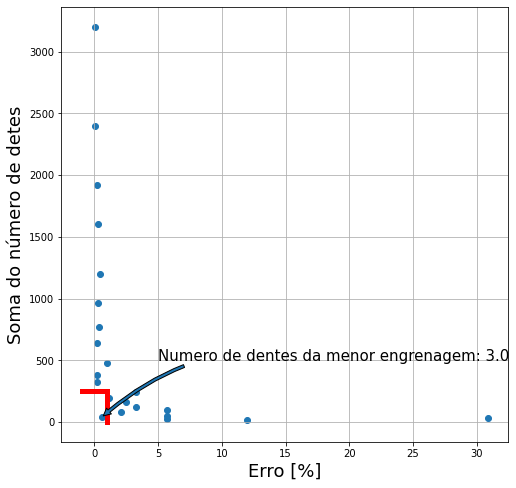

In [19]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(modulus_df['Erro [%]'], modulus_df['Soma de dentes'])
ax.plot((-1, 1), (250, 250), c='r', linewidth=5)
ax.plot((1, 1), (0, 250), c='r', linewidth=5)
first_try = modulus_df.loc[18]
ax.annotate(f'Numero de dentes da menor engrenagem: {first_try["Z1_1"]}', 
            xy=(first_try['Erro [%]'], first_try['Soma de dentes']),
            xytext=(5, 500),
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.25"),
            size=15)
ax.set_xlabel('Erro [%]', fontdict={'size': 18})
ax.set_ylabel('Soma do número de detes', fontdict={'size': 18})
ax.grid()

In [20]:
modulus_df = modulus_df[modulus_df['Soma de dentes']<250]
modulus_df = modulus_df[modulus_df['Z1_1']>4] 
modulus_df

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t,Erro [%],Soma de dentes
11,4.0,20.0,100.0,28.0,92.0,5.000000,3.285714,16.428571,3.265306,240.0
12,5.0,16.0,80.0,23.0,74.0,5.000000,3.217391,16.086957,1.118012,193.0
13,6.0,13.0,66.0,19.0,61.0,5.076923,3.210526,16.299595,2.454598,159.0
14,8.0,10.0,50.0,14.0,46.0,5.000000,3.285714,16.428571,3.265306,120.0
15,10.0,8.0,40.0,11.0,37.0,5.000000,3.363636,16.818182,5.714286,96.0
16,12.0,7.0,33.0,9.0,31.0,4.714286,3.444444,16.238095,2.068027,80.0


Tendo em vista que o erro percentual é $>1\%$ em todas as opções restantes, tentaremos ajustar o número de dentes, mantendo os módulos padronizados, de forma que o erro seja menor que o aceitável.

In [21]:
d1_1_ = modulus_df['modulo'] * modulus_df['Z1_1']
d2_1_ = modulus_df['modulo'] * modulus_df['Z2_1']
d1_2_ = modulus_df['modulo'] * modulus_df['Z1_2']
d2_2_ = modulus_df['modulo'] * modulus_df['Z2_2']

a_1_ = (d1_1_ + d2_1_)/2
a_2_ = (d1_2_ + d2_2_)/2

modulus_df['a_1'] = a_1_
modulus_df['a_2'] = a_2_
modulus_df

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,i_1,i_2,i_t,Erro [%],Soma de dentes,a_1,a_2
11,4.0,20.0,100.0,28.0,92.0,5.000000,3.285714,16.428571,3.265306,240.0,240.0,240.0
12,5.0,16.0,80.0,23.0,74.0,5.000000,3.217391,16.086957,1.118012,193.0,240.0,242.5
13,6.0,13.0,66.0,19.0,61.0,5.076923,3.210526,16.299595,2.454598,159.0,237.0,240.0
14,8.0,10.0,50.0,14.0,46.0,5.000000,3.285714,16.428571,3.265306,120.0,240.0,240.0
15,10.0,8.0,40.0,11.0,37.0,5.000000,3.363636,16.818182,5.714286,96.0,240.0,240.0
16,12.0,7.0,33.0,9.0,31.0,4.714286,3.444444,16.238095,2.068027,80.0,240.0,240.0


In [22]:
opt_df = pd.DataFrame(columns=['modulo',
                               'Z1_1', 'Z2_1', 
                               'Z1_2', 'Z2_2',
                               'd1_1', 'd2_1',
                               'd1_2', 'd2_2', 
                               'i_1', 'i_2', 'i_t',
                               'Erro [%]', 'Soma de dentes',
                               'a_1', 'a_2'])

for m_ in modulus_df['modulo']:
    for i in range(15,30):                 # Z1_1
        for j in range(30,105):            # Z2_1
            for k in range(15,30):         # Z1_2
                for l in range(30,120):    # Z2_2
                    Z_sum_ = i+j+k+l 
                    if Z_sum_ < 250:
                        
                        d1_1_ = i * m_
                        d2_1_ = j * m_
                        d1_2_ = k * m_
                        d2_2_ = l * m_

                        a_1_ = (d1_1_ + d2_1_)/2
                        a_2_ = (d1_2_ + d2_2_)/2

                        if np.abs(a_1_-a)<5 and np.abs(a_2_-a)<5:
                            
                            i_t_ = j/i * l/k
                            error_ = np.abs((i_t-i_t_)*100/i_t)
                            
                            if error_<1:
                            
                                r = {'modulo':m_,
                                     'Z1_1':i,
                                     'Z2_1':j, 
                                     'Z1_2':k,
                                     'Z2_2':l,
                                     'd1_1':d1_1_, 
                                     'd2_1':d2_1_,
                                     'd1_2':d1_2_,
                                     'd2_2':d2_2_,
                                     'i_1':j/i,
                                     'i_2':l/k, 
                                     'i_t':i_t_,
                                     'Erro [%]':error_,
                                     'Soma de dentes':Z_sum_,
                                     'a_1':a_1_,
                                     'a_2':a_2_}
                                     
                                opt_df = opt_df.append(r, ignore_index=True)

In [23]:
opt_df.sort_values('Erro [%]').head(15)

,modulo,Z1_1,Z2_1,Z1_2,Z2_2,d1_1,d2_1,d1_2,d2_2,i_1,i_2,i_t,Erro [%],Soma de dentes,a_1,a_2
17,4.0,21.0,97.0,27.0,93.0,84.0,388.0,108.0,372.0,4.619048,3.444444,15.910053,0.006047,238.0,236.0,240.0
81,4.0,27.0,93.0,21.0,97.0,108.0,372.0,84.0,388.0,3.444444,4.619048,15.910053,0.006047,238.0,240.0,236.0
9,4.0,20.0,99.0,28.0,90.0,80.0,396.0,112.0,360.0,4.950000,3.214286,15.910714,0.010204,237.0,238.0,236.0
86,4.0,28.0,90.0,20.0,99.0,112.0,360.0,80.0,396.0,3.214286,4.950000,15.910714,0.010204,237.0,236.0,238.0
16,4.0,21.0,96.0,27.0,94.0,84.0,384.0,108.0,376.0,4.571429,3.481481,15.915344,0.039305,238.0,234.0,242.0
82,4.0,27.0,94.0,21.0,96.0,108.0,376.0,84.0,384.0,3.481481,4.571429,15.915344,0.039305,238.0,242.0,234.0
18,4.0,21.0,98.0,27.0,92.0,84.0,392.0,108.0,368.0,4.666667,3.407407,15.901235,0.049383,238.0,238.0,238.0
79,4.0,27.0,92.0,21.0,98.0,108.0,368.0,84.0,392.0,3.407407,4.666667,15.901235,0.049383,238.0,238.0,238.0
35,4.0,22.0,99.0,26.0,92.0,88.0,396.0,104.0,368.0,4.500000,3.538462,15.923077,0.087912,239.0,242.0,236.0
69,4.0,26.0,92.0,22.0,99.0,104.0,368.0,88.0,396.0,3.538462,4.500000,15.923077,0.087912,239.0,236.0,242.0


In [24]:
best_pair = opt_df.iloc[18]
best_pair

modulo              4.000000
Z1_1               21.000000
Z2_1               98.000000
Z1_2               27.000000
Z2_2               92.000000
d1_1               84.000000
d2_1              392.000000
d1_2              108.000000
d2_2              368.000000
i_1                 4.666667
i_2                 3.407407
i_t                15.901235
Erro [%]            0.049383
Soma de dentes    238.000000
a_1               238.000000
a_2               238.000000
Name: 18, dtype: float64

#### **Deslocamento de perfil**
Tendo em vista que escolhemos um conjunto de engrenagens em que há uma com o número de dente inferior ao mínimo para não haver recorte, faz-se necessário o deslocamento de perfil para contornar esse problema.

A distância entre eixos do conjunto escolido é exatamente igual ao requisito de projeto. Devido a isso, utilizaremos o engrenamento Vê Zero.

**Engrenamento em Vê Zero**


$v = h_{ac} - r sin²\alpha$

$h_{ac} = K*m$

$x_{min} = K - {Z\over2}sin²\alpha$

In [25]:
K = 1 + c
h_ac = K * best_pair['modulo']
v = h_ac - (best_pair['d1_1']/2)*np.sin(alpha)**2
x_min = K - (best_pair['Z1_1']*np.sin(alpha)**2)/2

print('Altura de adendo:\t\t{}'.format(h_ac))
print('Deslocamento v: \t\t{}mm'.format(v))
print('Fator mínimo de deslocamento:\t{}'.format(x_min))

Altura de adendo:		5.0
Deslocamento v: 		0.0869333054985395mm
Fator mínimo de deslocamento:	0.021733326374634876


Para viabilizar a fabricação escolhe-se um deslocamento v maior do que o obtido. Como esse valor pode ser arbitrário, escolhe-se um deslocamento de $0.2mm$. Como consequência, temos que o novo $x$ é $0.05$ como definido abaixo:

In [26]:
x = 0.2/best_pair['modulo']
print('Novo fator de deslocamento: {}'.format(x))

Novo fator de deslocamento: 0.05


**Novas alturas de adendo e dedendo**

$h_{a1} = (1 + x_1)*m$

$h_{a2} = (1 + x_2)*m$

$h_{f1} = (1 + c - x_1)*m$

$h_{f2} = (1 + c - x_2)*m$

In [27]:
x1, x2 = x, -x

# Altura de adendo
h_a1 = (1 + x1) * best_pair['modulo']
h_a2 = (1 + x2) * best_pair['modulo']

# Altura de dedendo
h_f1 = (1 + c - x1) * best_pair['modulo']
h_f2 = (1 + c - x2) * best_pair['modulo']

best_pair['h_a_1_1'] = h_a1
best_pair['h_f_1_1'] = h_f1
best_pair['h_a_2_1'] = h_a2
best_pair['h_f_2_1'] = h_f2

print('Alturas de adendo e dedendo para o primeiro par: ')
print('Altura do Adendo 1: {}'.format(h_a1))
print('Altura do Adendo 2: {}'.format(h_a2))
print('Altura do Dedendo 1: {}'.format(h_f1))
print('Altura do Dedendo 2: {}'.format(h_f2))

Alturas de adendo e dedendo para o primeiro par: 
Altura do Adendo 1: 4.2
Altura do Adendo 2: 3.8
Altura do Dedendo 1: 4.8
Altura do Dedendo 2: 5.2


Para os próximos cálculos será necessário o uso de diversar propriedades das engrenagens que serão adicionadas ao nosso objeto `best_pair`nas próximas células

Cálculo das alturas de adendo e dedendo do segundo par (onde não há recorte do dente)


In [28]:
# Fórulas retiradas do slide "Parâmetros geométricos" de mecânismos
best_pair['h_a_1_2'] = best_pair['modulo']
best_pair['h_f_1_2'] = (1 + c)*best_pair['modulo']
best_pair['h_a_2_2'] = best_pair['modulo']
best_pair['h_f_2_2'] = (1 + c)*best_pair['modulo']
best_pair

modulo              4.000000
Z1_1               21.000000
Z2_1               98.000000
Z1_2               27.000000
Z2_2               92.000000
d1_1               84.000000
d2_1              392.000000
d1_2              108.000000
d2_2              368.000000
i_1                 4.666667
i_2                 3.407407
i_t                15.901235
Erro [%]            0.049383
Soma de dentes    238.000000
a_1               238.000000
a_2               238.000000
h_a_1_1             4.200000
h_f_1_1             4.800000
h_a_2_1             3.800000
h_f_2_1             5.200000
h_a_1_2             4.000000
h_f_1_2             5.000000
h_a_2_2             4.000000
h_f_2_2             5.000000
Name: 18, dtype: float64

Devido ao tipo de engrenamento utilizado, o passo das engrenagens continua o mesmo. Isso implica as seguintes condições para os parâmetros de operação

$a' = a$

$m' = m$

$\alpha' = \alpha$

Na próxima célula será computado o valor do passo para cada par de engrenagens utilizando-se da fórmula:

$p = {\pi d \over z}$

In [29]:
p = np.pi * best_pair['modulo']
best_pair['p'] = p

def ra_and_rb(d, h_a, alpha):
    """Calcula o raio de adendo e de base da engrenagem

    Parameters
    ----------
        d: float
            Diametro primitivo da engrenagem
        
        h_a: float
            Altura de adendo

        alpha: float
            Angulo de pressão

    Returns
    -------
        tuple
            Raio de adendo e raio da base respectivamente
    """
    d_a = d + 2*h_a
    d_b = d * np.cos(alpha)

    return d_a/2, d_b/2

best_pair['r_a_1_1'], best_pair['r_b_1_1'] = ra_and_rb(best_pair['d1_1'], best_pair['h_a_1_1'], alpha=alpha)
best_pair['r_a_2_1'], best_pair['r_b_2_1'] = ra_and_rb(best_pair['d2_1'], best_pair['h_a_2_1'], alpha=alpha)
best_pair['r_a_1_2'], best_pair['r_b_1_2'] = ra_and_rb(best_pair['d1_2'], best_pair['h_a_1_2'], alpha=alpha)
best_pair['r_a_2_2'], best_pair['r_b_2_2'] = ra_and_rb(best_pair['d2_2'], best_pair['h_a_2_2'], alpha=alpha)
best_pair


modulo              4.000000
Z1_1               21.000000
Z2_1               98.000000
Z1_2               27.000000
Z2_2               92.000000
d1_1               84.000000
d2_1              392.000000
d1_2              108.000000
d2_2              368.000000
i_1                 4.666667
i_2                 3.407407
i_t                15.901235
Erro [%]            0.049383
Soma de dentes    238.000000
a_1               238.000000
a_2               238.000000
h_a_1_1             4.200000
h_f_1_1             4.800000
h_a_2_1             3.800000
h_f_2_1             5.200000
h_a_1_2             4.000000
h_f_1_2             5.000000
h_a_2_2             4.000000
h_f_2_2             5.000000
p                  12.566371
r_a_1_1            46.200000
r_b_1_1            39.467090
r_a_2_1           199.800000
r_b_2_1           184.179754
r_a_1_2            58.000000
r_b_1_2            50.743402
r_a_2_2           188.000000
r_b_2_2           172.903442
Name: 18, dtype: float64

## Análise de fadiga superficial
- Método ISO

**Tensão de Contato Nominal**

$\sigma_{H0} = Z_H Z_E Z_\epsilon Z_\beta \sqrt{{F_t \over d_1 b}{u+1\over u}}$

**Onde**

$σ_{H0}$ = tensão de contato nominal;

$Z_H$ = fator de curvatura do flanco do dente;

$Z_E$ = fator de elasticidade;

$Z_ε$ = fator de razão de contato;

$Z_β$ = fator de ângulo de hélice;

$F_t$ = carga tangencial nominal;

$d_1$ = diâmetro primitivo do pinhão;

$b$ = largura da engrenagem;

$u$ = relação de transmissão.

**Material**

AISI 4820 (Composição de Níquel)

$E = 205$ GPa

$v = 0.29$ (Poisson ratio)

$σ_E$ = 1141 MPa (Tensão de Escoamento)

$σ_R$ = 1415 MPa (Tensão de Ruptura)

Fator de curvatura do flanco do dente

Fator de razão de contato de acordo com a equação 10.116

In [30]:
def Z_eps(r_a_1, r_b_1, r_a_2, r_b_2, 
          a=best_pair['a_1'],
          alpha=alpha,
          p=best_pair['p']):
    """Calcula o fator de razao de contato

    Parameters
    ----------
        r_a_1: float
            Raio de adendo da engrenagem 1

        r_b_1: float
            Raio de dedendo da engrenagem 1

        r_a_2: float
            Raio de adendo da engrenagem 2
            
        r_b_2: float
            Raio de dedendo da engrenagem 2

        a: float
            Distância entre eixos

        alpha: float
            Angulo de ?

        p: float
            Passo

    Returns
    -------
        float 
            Fator de razao de contato
    """
    p_b = p * np.cos(alpha)
    eps_alpha = (np.sqrt(r_a_1**2 - r_b_1**2) + np.sqrt(r_a_2**2 - r_b_2**2) \
                 - a*np.sin(alpha))/p_b
    print(eps_alpha)
    return np.sqrt((4 - eps_alpha)/3), eps_alpha


In [31]:
# Fator de contato do primeiro par
Z_eps_1, eps_alpha1 = Z_eps(r_a_1=best_pair['r_a_1_1'],
                r_b_1=best_pair['r_b_1_1'],
                r_a_2=best_pair['r_a_2_1'],
                r_b_2=best_pair['r_b_2_1'])

# Fator de contato do segundo par
Z_eps_2, eps_alpha2 = Z_eps(r_a_1=best_pair['r_a_1_2'],
                r_b_1=best_pair['r_b_1_2'],
                r_a_2=best_pair['r_a_2_2'],
                r_b_2=best_pair['r_b_2_2'])

1.6988975071110204
1.7363330544858706


In [32]:
Zh = 2.5 # From image 10.20, since x1 + x2 is equal to zero, and the helix angle is zero.

_v = 0.29 # Poisson
_E = 205000 # Young's Module
Ze = (1/(np.pi*((1-(_v)**2)/_E+(1-(_v)**2)/_E)))**(1/2) # Elasticity Factor

beta = 0 # Helix angle is zero
Zbet = (np.cos(beta))**(1/2)

T2 = 87133 # kgfmm
psi_d1 = (4*T*(best_pair['i_1']+1))/(best_pair['i_1']*y_m*(best_pair['d1_1'])**3)
psi_d2 = (4*T2*(best_pair['i_2']+1))/(best_pair['i_2']*y_m*(best_pair['d1_2'])**3)

Ft = 2*T*9.80665/(best_pair['d1_1']) # em N
# b = 50 # em mm
b1 = 50 # em mm
b2 = 25 # em mm

sigma_ho = Zh*Ze*Z_eps_1*Zbet*((Ft/(best_pair['d1_1']*b1)*(best_pair['i_1']+1)/best_pair['i_1']))**(1/2)
sigma_ho2 = Zh*Ze*Z_eps_2*Zbet*((Ft/(best_pair['d1_2']*b2)*(best_pair['i_2']+1)/best_pair['i_2']))**(1/2)

print(sigma_ho)
print(sigma_ho2)

463.95652143450934
592.348719633239


$\sigma_{H01}$ = 622 MPa\
$\sigma_{H02}$ = 562 MPa

Cálculo da tensão de contato nominais do pinhão e da coroa

Fator de contato do dente do Pinhão e da Coroa (Zb e Zd)

$\sigma_{H1} = Z_{B}*\sigma_{H0}*\sqrt{K_{A}*K_{v}*K_{H\beta}*K_{H\alpha}}$

$\sigma_{H2} = Z_{D}*\sigma_{H0}*\sqrt{K_{A}*K_{v}*K_{H\beta}*K_{H\alpha}}$


In [33]:
def eme(da1, db1, da2, db2, eps_a, z1, z2, alpha=alpha):
    """Calcula o fator de razao de contato

    Parameters
    ----------
        da1: float
            Diâmetro de adendo (eng 1)
            
        db1: float
            Diâmetro da base (eng 1)

        da2: float
            Diâmetro de adendo (eng 2)

        db2: float
            Diâmetro de base (eng 2)

        eps_a: float
            Razão de condução do par

        z1: int
            Número de dentes (eng 1)

        z2: int
            Número de dentes (eng 2)

        alpha: float
            Ângulo de ?
            
    Returns
    -------
        float 
            Constante para cálculo de Zb e Zd
    """
    pt1 = np.sqrt(np.sqrt((da1**2)/(db1**2) - 1) - 2*np.pi/z1)
    pt2 = np.sqrt((da2**2)/(db2**2) - 1) - (eps_a - 1)*2*np.pi/z2

    return np.tan(alpha)/(pt1*pt2)

m1_1 = eme(da1=2*best_pair['r_a_1_1'],
         db1=2*best_pair['r_b_1_1'],
         da2=2*best_pair['r_a_2_1'],
         db2=2*best_pair['r_b_2_1'],
         eps_a=Z_eps_1,
         z1=best_pair['Z1_1'],
         z2=best_pair['Z2_1'])

m2_1 = eme(da1=2*best_pair['r_a_2_1'],
         db1=2*best_pair['r_b_2_1'],
         da2=2*best_pair['r_a_1_1'],
         db2=2*best_pair['r_b_1_1'],
         eps_a=Z_eps_1,
         z1=best_pair['Z2_1'],
         z2=best_pair['Z1_1'])

m1_2 = eme(da1=2*best_pair['r_a_1_2'],
         db1=2*best_pair['r_b_1_2'],
         da2=2*best_pair['r_a_2_2'],
         db2=2*best_pair['r_b_2_2'],
         eps_a=Z_eps_2,
         z1=best_pair['Z1_2'],
         z2=best_pair['Z2_2'])

m2_2 = eme(da1=2*best_pair['r_a_2_2'],
         db1=2*best_pair['r_b_2_2'],
         da2=2*best_pair['r_a_1_2'],
         db2=2*best_pair['r_b_1_2'],
         eps_a=Z_eps_2,
         z1=best_pair['Z2_2'],
         z2=best_pair['Z1_2'])

# Primeiro par
Zb1 = 1 if m1_1 <= 1 else m1_1
Zd1 = 1 if m2_1 <= 1 else m2_1

# Primeiro par
Zb2 = 1 if m1_2 <= 1 else m1_2
Zd2 = 1 if m2_2 <= 1 else m2_2

In [34]:
def massa_reduzida(db1, ro1, ro2, u, da1, df1, da2, df2):
    """Calcula a massa reduzida do par de engrenagens

    Parameters
    ----------
        db1: float
            Diâmetro de base*
            
        ro1: float 
            Densidade do material

        ro2: float
            Densidade do material

        u: float
            Relação de transmissão*

        da1: float
            Diâmetro de adendo (eng 1)*

        df1: float
            Diâmetro de fundo (eng 1)*

        da2: float
            Diâmetro de adendo (eng 2)*

        df2: float
            Diâmetro de fundo (eng 2)*
    Returns
    -------
        float 
            Contastantes para o cálculo de massa reduzida
    """
    di1 = 1.5*(da1 - df1)/2
    dm1 = (da1 + df1)/2
    dm2 = (da2 + df2)/2
    q1 = di1/dm1
    q2 = di1/dm2
    mred = (np.pi/8)*((dm1/db1)**2)*(dm1**2)/((1/((1 - q1**4)*ro1)) + (1/((1 - q2**2)*ro2*(u**2))))

    return mred

def c_gamma_alpha(Zn1, Zn2, x1, x2, hfP, m_n, alpha_Pn, eps_alpha):
    """Valor médio  da rigidez da malha por largura nominal unitária

    Parameters
    ----------
    Zn1: int
        Numero de dentes da primeira engrenagem

    Zn2: int
        Numero de dentes da segunda engrenagem
    
    x1: float
        Afastamento da primeira engrenagem
    
    x2: float
        Afastamento da segunda engrenagem

    hfp: float
        A altura de dedendo dada pela figura H.3

    m_n: float
        Módulo normal

    alpha_Pn: float
        Ângulo de pressão normal em relação ao suporte do dente

    eps_alpha: float
        ???????
    
    Returns
    -------
        float
            Valor médio  da rigidez da malha por largura nominal unitária
        
        float
            Cm

        float
            Cr

        float
            Cb
    """
    q_linha = 0.04723 \
            + 0.15551/Zn1\
            + 0.25791/Zn2 \
            - 0.00635*x1 \
            - 0.11654*x1 \
            - 0.00193*x2 \
            - 0.24188*x2/Zn2 \
            + 0.00529*x1**2 \
            + 0.00182*x2**2

    # Fator de correção
    Cm = 0.8

    # Fator de rigidez (fig. H.4)
    Cr = 0.86 # bs=15mm e Sr=10

    # Fator de suporte básico
    Cb = (1 + 0.5*(1.25 - hfP/m_n))*(1-0.02*(np.pi/9 - alpha_Pn)) # TODO

    c_gam_alph = Cm*Cr*Cb*(0.75*eps_alpha + 0.25) / q_linha

    return c_gam_alph, Cm, Cr, Cb, q_linha
    
def K_v(n1, Z1, mred, c_gamma_alpha, Cm, Cr, Cb, q_linha, F_t, b):

    # TODO: Verificar o N para condição de ressonância
    N = n1*np.pi*Z1*np.sqrt(mred/c_gamma_alpha)/30000
    print(f'Valor de N: {N}')

    # Figura 10.23 pg 323
    Ca = 7.1

    # Tabela G8 pg 403
    feff = 51 # Valor para qualidade 8

    Bp = Cm*Cr*Cb*feff/(q_linha*Ka*F_t/b) 
    Bf = Bp
    Bk = np.abs(1 - Ca*Cm*Cr*Cb/(Ka*F_t/b))

    # Tabela 10.1 pg323 pdf
    CV1 = 0.32
    CV2 = 0.34
    CV3 = 0.23

    Kv = N*((CV1*Bp) + (CV2*Bf) + (CV3*Bk)) + 1

    return Kv


Ka = 1.35 #According to page 403 (choques leves)

### Cálculo das tensões nominais do pinhão e da coroa de cada par

In [35]:
def tensao_nominal_pinhao_coroa(Zb, Zd, sigma_ho, Kv, Ka=Ka):
    """
    Doc
    """
    sigma_h1 = Zb*sigma_ho*np.sqrt(Ka*Kv)
    sigma_h2 = Zd*sigma_ho*np.sqrt(Ka*Kv)

    return sigma_h1, sigma_h2

In [53]:
# Primero par
mred1 = massa_reduzida(
    db1=2*best_pair['r_b_1_1'], 
    ro1=7850/(10**9), # Kg/mm³
    ro2=7850/(10**9), # Kg/mm³
    u=best_pair['i_1'],
    da1=2*best_pair['r_a_1_1'],
    df1=best_pair['d1_1']-2*best_pair['h_f_1_1'], 
    da2=2*best_pair['r_a_2_1'],
    df2=best_pair['d2_1']-2*best_pair['h_f_2_1']
    )

c_gamma_alpha1, Cm1, Cr1, Cb1, q_linha1 = c_gamma_alpha(
    Zn1=best_pair['Z1_1'],
    Zn2=best_pair['Z2_1'], 
    x1=x1, 
    x2=x2,
    hfP=best_pair['h_f_1_1'], 
    m_n=best_pair['modulo'], 
    alpha_Pn=alpha, 
    eps_alpha=eps_alpha1
    )

K_v1 = K_v(
    n1=rpm_in, 
    Z1=best_pair['Z1_1'], 
    mred=mred1,
    c_gamma_alpha=c_gamma_alpha1,
    Cm=Cm1,
    Cr=Cr1,
    Cb=Cb1,
    q_linha=q_linha1, 
    F_t=Ft,
    b=b1
    )

sigma_h1_1, sigma_h2_1 = tensao_nominal_pinhao_coroa(
    Zb=Zb1,
    Zd=Zd1,
    sigma_ho=sigma_ho,
    Kv=K_v1
    )

# Segundo par
mred2 = massa_reduzida(
    db1=2*best_pair['r_b_1_2'], 
    ro1=7850/(10**9),
    ro2=7850/(10**9),
    u=best_pair['i_2'],
    da1=2*best_pair['r_a_1_2'],
    df1=best_pair['d1_2']-2*best_pair['h_f_1_2'], 
    da2=2*best_pair['r_a_2_2'],
    df2=best_pair['d2_2']-2*best_pair['h_f_2_2']
    )

c_gamma_alpha2, Cm2, Cr2, Cb2, q_linha2 = c_gamma_alpha(
    Zn1=best_pair['Z1_2'],
    Zn2=best_pair['Z2_2'], 
    x1=0,
    x2=0,
    hfP=best_pair['h_f_1_2'], 
    m_n=best_pair['modulo'], 
    alpha_Pn=alpha, 
    eps_alpha=eps_alpha1
    )

K_v2 = K_v(
    n1=375, # rpm
    Z1=best_pair['Z1_2'], 
    mred=mred2,
    c_gamma_alpha=c_gamma_alpha2,
    Cm=Cm2,
    Cr=Cr2,
    Cb=Cb2,
    q_linha=q_linha2, 
    F_t=2*T2*9.806/best_pair['d1_2'], # N
    b=b2 
    )

sigma_h1_2, sigma_h2_2 = tensao_nominal_pinhao_coroa(
    Zb=Zb2,
    Zd=Zd2,
    sigma_ho=sigma_ho2,
    Kv=K_v2
    )

print(f'Massa reduzida do primeiro par: {round(mred1, 4)}, \n\
Massa reduzida do segudno par: {round(mred2, 2)}\n')

print(f'c_gamma_alpha do primeiro par: {round(c_gamma_alpha1, 2)},\n\
c_gamma_alpha do segundo par: {round(c_gamma_alpha2, 2)}\n')

print(f' Kv do primeiro e segundo par: {round(K_v1, 2)}, {round(K_v2, 2)}\n')
print('Tensões das engrenagens do primeiro par:')
print(f'{round(sigma_h1_1, 2)} MPa, {round(sigma_h2_1, 2)} MPa')
print()
print('Tensões das engrenagens do segundo par:')
print(f'{round(sigma_h1_2, 2)} MPa, {round(sigma_h2_2, 2)} MPa')

Valor de N: 0.1272198031351614
Valor de N: 0.046474004226053044
Massa reduzida do primeiro par: 0.0229, 
Massa reduzida do segudno par: 0.04

c_gamma_alpha do primeiro par: 20.93,
c_gamma_alpha do segundo par: 18.8

 Kv do primeiro e segundo par: 1.53, 1.03

Tensões das engrenagens do primeiro par:
1017.64 MPa, 666.25 MPa

Tensões das engrenagens do segundo par:
1031.26 MPa, 727.89 MPa


In [54]:
60*24.56

1473.6

1.9576300550093686

modulo              4.000000
Z1_1               21.000000
Z2_1               98.000000
Z1_2               27.000000
Z2_2               92.000000
d1_1               84.000000
d2_1              392.000000
d1_2              108.000000
d2_2              368.000000
i_1                 4.666667
i_2                 3.407407
i_t                15.901235
Erro [%]            0.049383
Soma de dentes    238.000000
a_1               238.000000
a_2               238.000000
h_a_1_1             4.200000
h_f_1_1             4.800000
h_a_2_1             3.800000
h_f_2_1             5.200000
h_a_1_2             4.000000
h_f_1_2             5.000000
h_a_2_2             4.000000
h_f_2_2             5.000000
p                  12.566371
r_a_1_1            46.200000
r_b_1_1            39.467090
r_a_2_1           199.800000
r_b_2_1           184.179754
r_a_1_2            58.000000
r_b_1_2            50.743402
r_a_2_2           188.000000
r_b_2_2           172.903442
Name: 18, dtype: float64

$\sigma_{H1}$ = 1032 MPa\
$\sigma_{H2}$ = 675 MPa\
\
$\sigma_{H1}$ = 778 MPa\
$\sigma_{H2}$ = 550 MPa